#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [0]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)
import matplotlib.pyplot as plt
%matplotlib inline

# 資料準備

In [4]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [5]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [0]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [8]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [10]:
# 宣告採用序列模型
model = Sequential()

# 卷積層1 - filters=32
# 與池化層1
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32,3), activation='relu', padding='same'))
model.add(Dropout(rate=0.25)) # Dropout
model.add(MaxPooling2D(pool_size=(2, 2)))


# 卷積層2 - filters=64
# 與池化層2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Dropout(rate=0.25)) # Dropout
model.add(MaxPooling2D(pool_size=(2, 2)))



"""# 建立神經網路(平坦層、隱藏層、輸出層)"""
model.add(Flatten())
model.add(Dropout(rate=0.25)) # Dropout

""" 1. fully connected layer """
# 建立全網路連接層
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25)) # Dropout

""" 2. output layer """
#建立輸出層
model.add(Dense(10, activation='softmax'))



#檢查model 的STACK
print(model.summary())





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         


# 載入之前訓練的模型

In [11]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [0]:
def check_model(loss_function) :
        
    model.compile(loss = loss_function, optimizer='sgd', metrics=['accuracy'])

    #模型訓練, "Train_History" 把訓練過程所得到的數值存起來
    train_history = model.fit(x_img_train_normalize, 
                              y_label_train_OneHot,
                              validation_split=0.25,
                              epochs=12, 
                              batch_size=128, 
                              verbose=1
                             )         

    # [validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的比例。
    # 該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
    # [batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

    # 定義一個繪圖函數
    def show_train_history(train_history, train, validation):
        plt.plot(train_history.history[train])
        plt.plot(train_history.history[validation])
        plt.title('Train History')
        plt.ylabel(train)
        plt.xlabel('Epoch')
        plt.legend(['train', 'validation'], loc='upper left')
        plt.show()
        
    # plot
    show_train_history(train_history, 'acc', 'val_acc')
    plt.show()
    show_train_history(train_history, 'loss', 'val_loss')

    # scores
    scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
    print()
    print('accuracy=',scores[1])

In [13]:
y_label_test_OneHot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 37500 samples, validate on 12500 samples
Epoch 1/12





37500/37500 [==============================] - 122s 3ms/step - loss: 2.1631 - acc: 0.1975 - val_loss: 2.0456 - val_acc: 0.2977
Epoch 2/12
37500/37500 [==============================] - 122s 3ms/step - loss: 1.9532 - acc: 0.2972 - val_loss: 1.9274 - val_acc: 0.3503
Epoch 3/12
37500/37500 [==============================] - 121s 3ms/step - loss: 1.8317 - acc: 0.3465 - val_loss: 1.8339 - val_acc: 0.3816
Epoch 4/12
37500/37500 [==============================] - 124s 3ms/step - loss: 1.7306 - acc: 0.3812 - val_loss: 1.7426 - val_acc: 0.4159
Epoch 5/12
37500/37500 [==============================] - 123s 3ms/step - loss: 1.6514 - acc: 0.4092 - val_loss: 1.6739 - val_acc: 0.4378
Epoch 6/12
37500/37500 [==============================] - 123s 3ms/step - loss: 1.5884 - acc: 0.4294 - val_loss: 1.6429 - val_acc: 0.4542
Epoch 7/12
37500/3

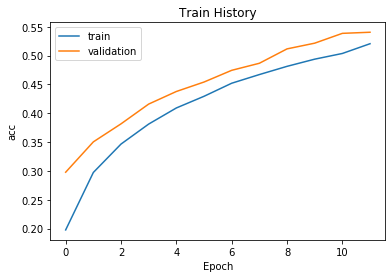

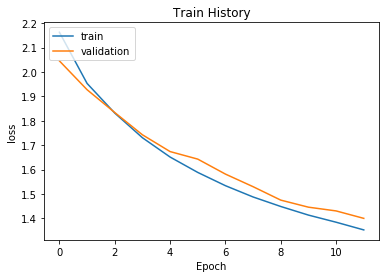

10000/10000 [==============================] - 8s 791us/step

accuracy= 0.5503


In [14]:
loss_function = 'categorical_crossentropy'
check_model(loss_function)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 123s 3ms/step - loss: 0.0607 - acc: 0.5311 - val_loss: 0.0628 - val_acc: 0.5505
Epoch 2/12
37500/37500 [==============================] - 123s 3ms/step - loss: 0.0604 - acc: 0.5329 - val_loss: 0.0627 - val_acc: 0.5498
Epoch 3/12
37500/37500 [==============================] - 123s 3ms/step - loss: 0.0605 - acc: 0.5308 - val_loss: 0.0626 - val_acc: 0.5517
Epoch 4/12
37500/37500 [==============================] - 123s 3ms/step - loss: 0.0603 - acc: 0.5355 - val_loss: 0.0627 - val_acc: 0.5505
Epoch 5/12
37500/37500 [==============================] - 122s 3ms/step - loss: 0.0601 - acc: 0.5351 - val_loss: 0.0625 - val_acc: 0.5526
Epoch 6/12
37500/37500 [==============================] - 120s 3ms/step - loss: 0.0603 - acc: 0.5347 - val_loss: 0.0624 - val_acc: 0.5522
Epoch 7/12
37500/37500 [==============================] - 118s 3ms/step - loss: 0.0603 - acc: 0.5343 - val_loss: 0.0624 - 

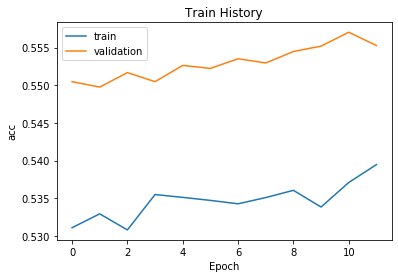

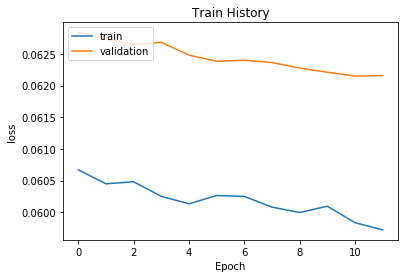

10000/10000 [==============================] - 7s 738us/step

accuracy= 0.5569


In [15]:
loss_function = 'mean_squared_error'
check_model(loss_function)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 123s 3ms/step - loss: 0.2027 - acc: 0.9203 - val_loss: 0.2116 - val_acc: 0.9159
Epoch 2/12
37500/37500 [==============================] - 123s 3ms/step - loss: 0.2019 - acc: 0.9208 - val_loss: 0.2115 - val_acc: 0.9159
Epoch 3/12
37500/37500 [==============================] - 119s 3ms/step - loss: 0.2012 - acc: 0.9213 - val_loss: 0.2105 - val_acc: 0.9164
Epoch 4/12
37500/37500 [==============================] - 122s 3ms/step - loss: 0.2020 - acc: 0.9203 - val_loss: 0.2105 - val_acc: 0.9162
Epoch 5/12
37500/37500 [==============================] - 123s 3ms/step - loss: 0.2006 - acc: 0.9212 - val_loss: 0.2099 - val_acc: 0.9165
Epoch 6/12
37500/37500 [==============================] - 123s 3ms/step - loss: 0.2002 - acc: 0.9216 - val_loss: 0.2097 - val_acc: 0.9166
Epoch 7/12
37500/37500 [==============================] - 123s 3ms/step - loss: 0.1996 - acc: 0.9216 - val_loss: 0.2090 - 

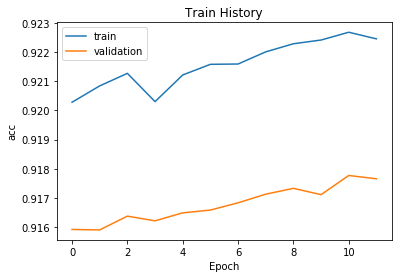

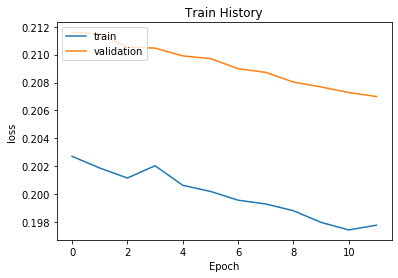

10000/10000 [==============================] - 7s 711us/step

accuracy= 0.9179899751663207


In [16]:
loss_function = 'binary_crossentropy'
check_model(loss_function)